# 数据预处理

## 0. 读取数据

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore')
import datetime

In [3]:
train_bank = pd.read_csv('drive/MyDrive/AI_Project/data/train_dataset/train_public2.csv')
train_internet = pd.read_csv('drive/MyDrive/AI_Project/data/train_dataset/train_internet2.csv')
test = pd.read_csv('drive/MyDrive/AI_Project/data/test_public2.csv')

train_bank.rename(columns={'isDefault': 'is_default'}, inplace=True)

## 1. 合并相同特征

找到train_bank和train_internet表中相同的特征

In [4]:
common_cols = []
for col in train_bank.columns:
    if col in train_internet.columns:
        common_cols.append(col)
    else: continue
len(common_cols)

36

删除train_bank和train_internet不同的特征后合并为“训练集”

In [5]:
train_bank_left = list(set(list(train_bank.columns)) - set(common_cols))
train_internet_left = list(set(list(train_internet.columns)) - set(common_cols))

In [6]:
# train_bank删除的特征
train_bank_left

['app_type', 'known_dero', 'known_outstanding_loan']

In [7]:
# train_internet删除的特征
train_internet_left

['house_loan_status', 'f5', 'work_type', 'sub_class', 'marriage', 'offsprings']

In [8]:
train1_data = train_internet[common_cols]
train2_data = train_bank[common_cols]
train_data = pd.concat([train1_data, train2_data])

test_data = test[common_cols[:-1]]

## 2. 处理object类型的特征

In [9]:
# 查看训练集的数据类型
train_data.dtypes

loan_id                       int64
user_id                       int64
total_loan                  float64
year_of_loan                  int64
interest                    float64
monthly_payment             float64
class                        object
employer_type                object
industry                     object
work_year                    object
house_exist                   int64
censor_status                 int64
issue_date                   object
use                           int64
post_code                   float64
region                        int64
debt_loan_ratio             float64
del_in_18month                int64
scoring_low                 float64
scoring_high                float64
pub_dero_bankrup            float64
recircle_b                  float64
recircle_u                  float64
initial_list_status           int64
earlies_credit_mon           object
title                       float64
policy_code                   int64
f0                          

In [10]:
# 查看测试集的数据类型
test_data.dtypes

loan_id                       int64
user_id                       int64
total_loan                  float64
year_of_loan                  int64
interest                    float64
monthly_payment             float64
class                        object
employer_type                object
industry                     object
work_year                    object
house_exist                   int64
censor_status                 int64
issue_date                   object
use                           int64
post_code                     int64
region                        int64
debt_loan_ratio             float64
del_in_18month                int64
scoring_low                 float64
scoring_high                float64
pub_dero_bankrup            float64
recircle_b                  float64
recircle_u                  float64
initial_list_status           int64
earlies_credit_mon           object
title                         int64
policy_code                   int64
f0                          

发现`class`，`work_year`、`employ_type`、`industry`、`issue_date`、`early_credit_mon`等特征为`object`类型，需要处理为`int`或`float`类型

### class

In [11]:
# 处理前的class特征
train_data['class']

0       B
1       C
2       D
3       B
4       B
       ..
9995    B
9996    A
9997    B
9998    D
9999    C
Name: class, Length: 760000, dtype: object

In [12]:
train_data['class'] = train_data['class'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})
test_data['class'] = test_data['class'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6})

In [13]:
# 处理后的class特征
train_data['class']

0       1
1       2
2       3
3       1
4       1
       ..
9995    1
9996    0
9997    1
9998    3
9999    2
Name: class, Length: 760000, dtype: int64

### work_year

In [14]:
# 处理前
train_data['work_year']

0             NaN
1       10+ years
2       10+ years
3         2 years
4         5 years
          ...    
9995      7 years
9996      2 years
9997    10+ years
9998    10+ years
9999      7 years
Name: work_year, Length: 760000, dtype: object

In [15]:
work_year_map = {'10+ years': 10, '2 years': 2, '< 1 year': 0, '3 years': 3, '1 year': 1,
     '5 years': 5, '4 years': 4, '6 years': 6, '8 years': 8, '7 years': 7, '9 years': 9}

train_data['work_year']  = train_data['work_year'].map(work_year_map)
test_data['work_year']  = test_data['work_year'].map(work_year_map)

In [16]:
# 处理后
train_data['work_year']

0        NaN
1       10.0
2       10.0
3        2.0
4        5.0
        ... 
9995     7.0
9996     2.0
9997    10.0
9998    10.0
9999     7.0
Name: work_year, Length: 760000, dtype: float64

### employ_type

In [17]:
# 处理前
train_data['employer_type']

0         普通企业
1         普通企业
2         上市企业
3         普通企业
4         政府机构
         ...  
9995      普通企业
9996      政府机构
9997      普通企业
9998      政府机构
9999    高等教育机构
Name: employer_type, Length: 760000, dtype: object

In [18]:
employer_type = train1_data['employer_type'].value_counts().index
emp_type_dict = dict(zip(employer_type, [0,1,2,3,4,5]))

train_data['employer_type'] = train_data['employer_type'].map(emp_type_dict)
test_data['employer_type'] = test_data['employer_type'].map(emp_type_dict)

In [19]:
# 处理后
train_data['employer_type']

0       0
1       0
2       3
3       0
4       1
       ..
9995    0
9996    1
9997    0
9998    1
9999    5
Name: employer_type, Length: 760000, dtype: int64

### industry

In [20]:
# 处理前
train_data['industry']

0                   采矿业
1                  国际组织
2       信息传输、软件和信息技术服务业
3            电力、热力生产供应业
4                   金融业
             ...       
9995                建筑业
9996           农、林、牧、渔业
9997    信息传输、软件和信息技术服务业
9998           农、林、牧、渔业
9999    信息传输、软件和信息技术服务业
Name: industry, Length: 760000, dtype: object

In [21]:
industry = train_data['industry'].value_counts().index
industry_dict = dict(zip(industry, [i for i in range(15)]))

train_data['industry'] = train_data['industry'].map(industry_dict)
test_data['industry'] = test_data['industry'].map(industry_dict)

In [22]:
# 处理后
train_data['industry']

0       10
1       11
2        5
3        1
4        0
        ..
9995     6
9996     9
9997     5
9998     9
9999     5
Name: industry, Length: 760000, dtype: int64

### issue_date

In [23]:
# 处理前
train_data['issue_date']

0        2015/6/1
1       2010/10/1
2        2016/8/1
3        2013/5/1
4        2017/4/1
          ...    
9995    2013/11/1
9996    2015/12/1
9997    2012/12/1
9998     2018/3/1
9999     2017/5/1
Name: issue_date, Length: 760000, dtype: object

In [24]:
# 转换为pandas中的日期类型
train_data['issue_date'] = pd.to_datetime(train_data['issue_date'])
# 提取多尺度特征
train_data['issue_date_y'] = train_data['issue_date'].dt.year
train_data['issue_date_m'] = train_data['issue_date'].dt.month
# 提取时间diff
# 设置初始的时间
base_time = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
# 转换为天为单位
train_data['issue_date_diff'] = train_data['issue_date'].apply(lambda x: x-base_time).dt.days
train_data[['issue_date', 'issue_date_y', 'issue_date_m', 'issue_date_diff']]
train_data.drop('issue_date', axis = 1, inplace = True)

In [25]:
# 转换为pandas中的日期类型
test_data['issue_date'] = pd.to_datetime(test_data['issue_date'])
# 提取多尺度特征
test_data['issue_date_y'] = test_data['issue_date'].dt.year
test_data['issue_date_m'] = test_data['issue_date'].dt.month
# 提取时间diff
# 设置初始的时间
base_time = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
# 转换为天为单位
test_data['issue_date_diff'] = test_data['issue_date'].apply(lambda x: x-base_time).dt.days
test_data[['issue_date', 'issue_date_y', 'issue_date_m', 'issue_date_diff']]
test_data.drop('issue_date', axis = 1, inplace = True)

In [26]:
# 处理后
train_data[['issue_date_y', 'issue_date_m', 'issue_date_diff']]

,issue_date_y,issue_date_m,issue_date_diff
0,2015,6,2922
1,2010,10,1218
2,2016,8,3349
3,2013,5,2161
4,2017,4,3592
...,...,...,...
9995,2013,11,2345
9996,2015,12,3105
9997,2012,12,2010
9998,2018,3,3926


### early_credit_mon

In [27]:
# 处理前
train_data['earlies_credit_mon']

0       1984-03-01
1       1992-01-01
2       1996-10-01
3       2000-07-01
4       2000-03-01
           ...    
9995    2023-02-06
9996    1997-05-01
9997    1987-02-01
9998    1992-10-01
9999    2023-02-09
Name: earlies_credit_mon, Length: 760000, dtype: object

In [28]:
# 转换为pandas中的日期类型
train_data['earlies_credit_mon'] = pd.to_datetime(train_data['earlies_credit_mon'])
# 提取多尺度特征
train_data['earlies_credit_mon_y'] = train_data['earlies_credit_mon'].dt.year
train_data['earlies_credit_mon_m'] = train_data['earlies_credit_mon'].dt.month
# 提取时间diff
# 设置初始的时间
base_time = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
# 转换为天为单位
train_data['earlies_credit_mon_diff'] = train_data['earlies_credit_mon'].apply(lambda x: x-base_time).dt.days
train_data[['earlies_credit_mon', 'earlies_credit_mon_y', 'earlies_credit_mon_m', 'earlies_credit_mon_diff']]
train_data.drop('earlies_credit_mon', axis = 1, inplace = True)

In [29]:
# 转换为pandas中的日期类型
test_data['earlies_credit_mon'] = pd.to_datetime(test_data['earlies_credit_mon'])
# 提取多尺度特征
test_data['earlies_credit_mon_y'] = test_data['earlies_credit_mon'].dt.year
test_data['earlies_credit_mon_m'] = test_data['earlies_credit_mon'].dt.month
# 提取时间diff
# 设置初始的时间
base_time = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d')
# 转换为天为单位
test_data['earlies_credit_mon_diff'] = test_data['earlies_credit_mon'].apply(lambda x: x-base_time).dt.days
test_data[['earlies_credit_mon', 'earlies_credit_mon_y', 'earlies_credit_mon_m', 'earlies_credit_mon_diff']]
test_data.drop('earlies_credit_mon', axis = 1, inplace = True)

In [30]:
# 处理后
train_data[['earlies_credit_mon_y', 'earlies_credit_mon_m', 'earlies_credit_mon_diff']]

,earlies_credit_mon_y,earlies_credit_mon_m,earlies_credit_mon_diff
0,1984,3,-8492
1,1992,1,-5630
2,1996,10,-3895
3,2000,7,-2526
4,2000,3,-2648
...,...,...,...
9995,2023,2,5729
9996,1997,5,-3683
9997,1987,2,-7425
9998,1992,10,-5356


## 3. 处理缺失值

In [31]:
# 检查训练集中的空值情况
train_data.isnull().sum()

loan_id                         0
user_id                         0
total_loan                      0
year_of_loan                    0
interest                        0
monthly_payment                 0
class                           0
employer_type                   0
industry                        0
work_year                   44469
house_exist                     0
censor_status                   0
use                             0
post_code                       1
region                          0
debt_loan_ratio               230
del_in_18month                  0
scoring_low                     0
scoring_high                    0
pub_dero_bankrup              382
recircle_b                      0
recircle_u                    489
initial_list_status             0
title                           1
policy_code                     0
f0                          38296
f1                          66269
f2                          38296
f3                          38297
f4            

In [32]:
# 检查测试集中的空值情况
test_data.isnull().sum()

loan_id                       0
user_id                       0
total_loan                    0
year_of_loan                  0
interest                      0
monthly_payment               0
class                         0
employer_type                 0
industry                      0
work_year                   278
house_exist                   0
censor_status                 0
use                           0
post_code                     0
region                        0
debt_loan_ratio               0
del_in_18month                0
scoring_low                   0
scoring_high                  0
pub_dero_bankrup              4
recircle_b                    0
recircle_u                    0
initial_list_status           0
title                         0
policy_code                   0
f0                          259
f1                          454
f2                          259
f3                          259
f4                          259
early_return                  0
early_re

`work_year`, `title`, `pub_dero_bankrup`, `f0`, `f1`, `f2`, `f3`, `f4`列使用`0`填充缺失值

In [33]:
train_data[['work_year', 'title', 'pub_dero_bankrup', 'f0', 'f1', 'f2', 'f3', 'f4']] = train_data[['work_year', 'title', 'pub_dero_bankrup', 'f0', 'f1', 'f2', 'f3', 'f4']].fillna(0)
test_data[['work_year', 'pub_dero_bankrup', 'f0', 'f1', 'f2', 'f3', 'f4']] = test_data[['work_year', 'pub_dero_bankrup', 'f0', 'f1', 'f2', 'f3', 'f4']].fillna(0)

`debt_loan_ratio`, `recircle_u`使用平均值填充缺失值

In [34]:
# 计算多列的平均值
mean_values = train_data[['debt_loan_ratio', 'recircle_u']].mean()

# 用平均值填充多列的缺失值
train_data[['debt_loan_ratio', 'recircle_u']] = train_data[['debt_loan_ratio', 'recircle_u']].fillna(mean_values)

In [35]:
# 检查训练集中是否还存在空值
train_data.isnull().sum()

loan_id                     0
user_id                     0
total_loan                  0
year_of_loan                0
interest                    0
monthly_payment             0
class                       0
employer_type               0
industry                    0
work_year                   0
house_exist                 0
censor_status               0
use                         0
post_code                   1
region                      0
debt_loan_ratio             0
del_in_18month              0
scoring_low                 0
scoring_high                0
pub_dero_bankrup            0
recircle_b                  0
recircle_u                  0
initial_list_status         0
title                       0
policy_code                 0
f0                          0
f1                          0
f2                          0
f3                          0
f4                          0
early_return                0
early_return_amount         0
early_return_amount_3mon    0
is_default

In [36]:
# 检查测试集中是否还存在空值
test_data.isnull().sum()

loan_id                     0
user_id                     0
total_loan                  0
year_of_loan                0
interest                    0
monthly_payment             0
class                       0
employer_type               0
industry                    0
work_year                   0
house_exist                 0
censor_status               0
use                         0
post_code                   0
region                      0
debt_loan_ratio             0
del_in_18month              0
scoring_low                 0
scoring_high                0
pub_dero_bankrup            0
recircle_b                  0
recircle_u                  0
initial_list_status         0
title                       0
policy_code                 0
f0                          0
f1                          0
f2                          0
f3                          0
f4                          0
early_return                0
early_return_amount         0
early_return_amount_3mon    0
issue_date

## 4. 处理异常值

In [37]:
import matplotlib.pyplot as plt

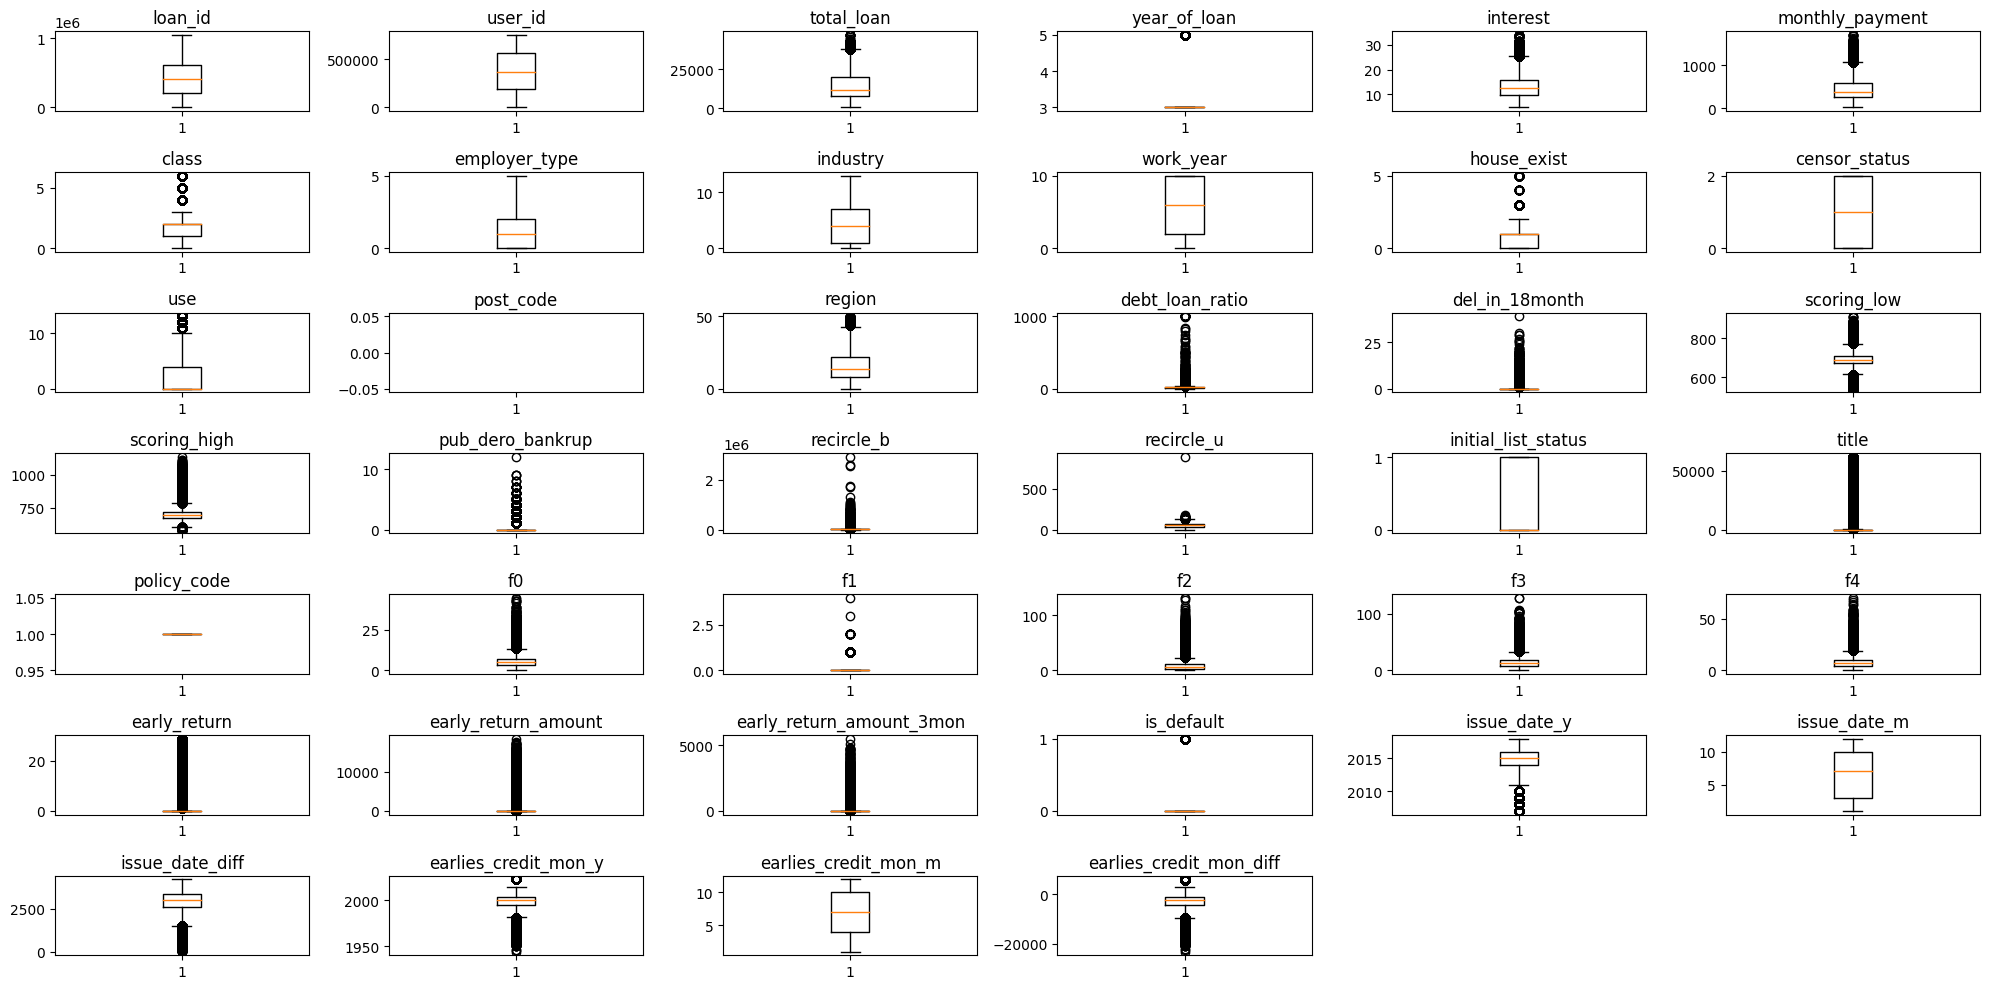

In [38]:
# 选择要绘制箱形图的列
columns = train_data.columns

# 设置图形的大小
plt.figure(figsize=(20, 10))

# 循环绘制每一列的箱形图
for i, column in enumerate(columns, 1):
    plt.subplot(7, 6, i)  # 调整子图的布局，根据实际情况调整行和列的数量
    plt.boxplot(train_data[column])
    plt.title(column)

# 调整子图的布局
plt.tight_layout()

# 显示图形
plt.show()

## 5. 特征降维

看到特征之间的相关性

In [39]:
import seaborn as sns

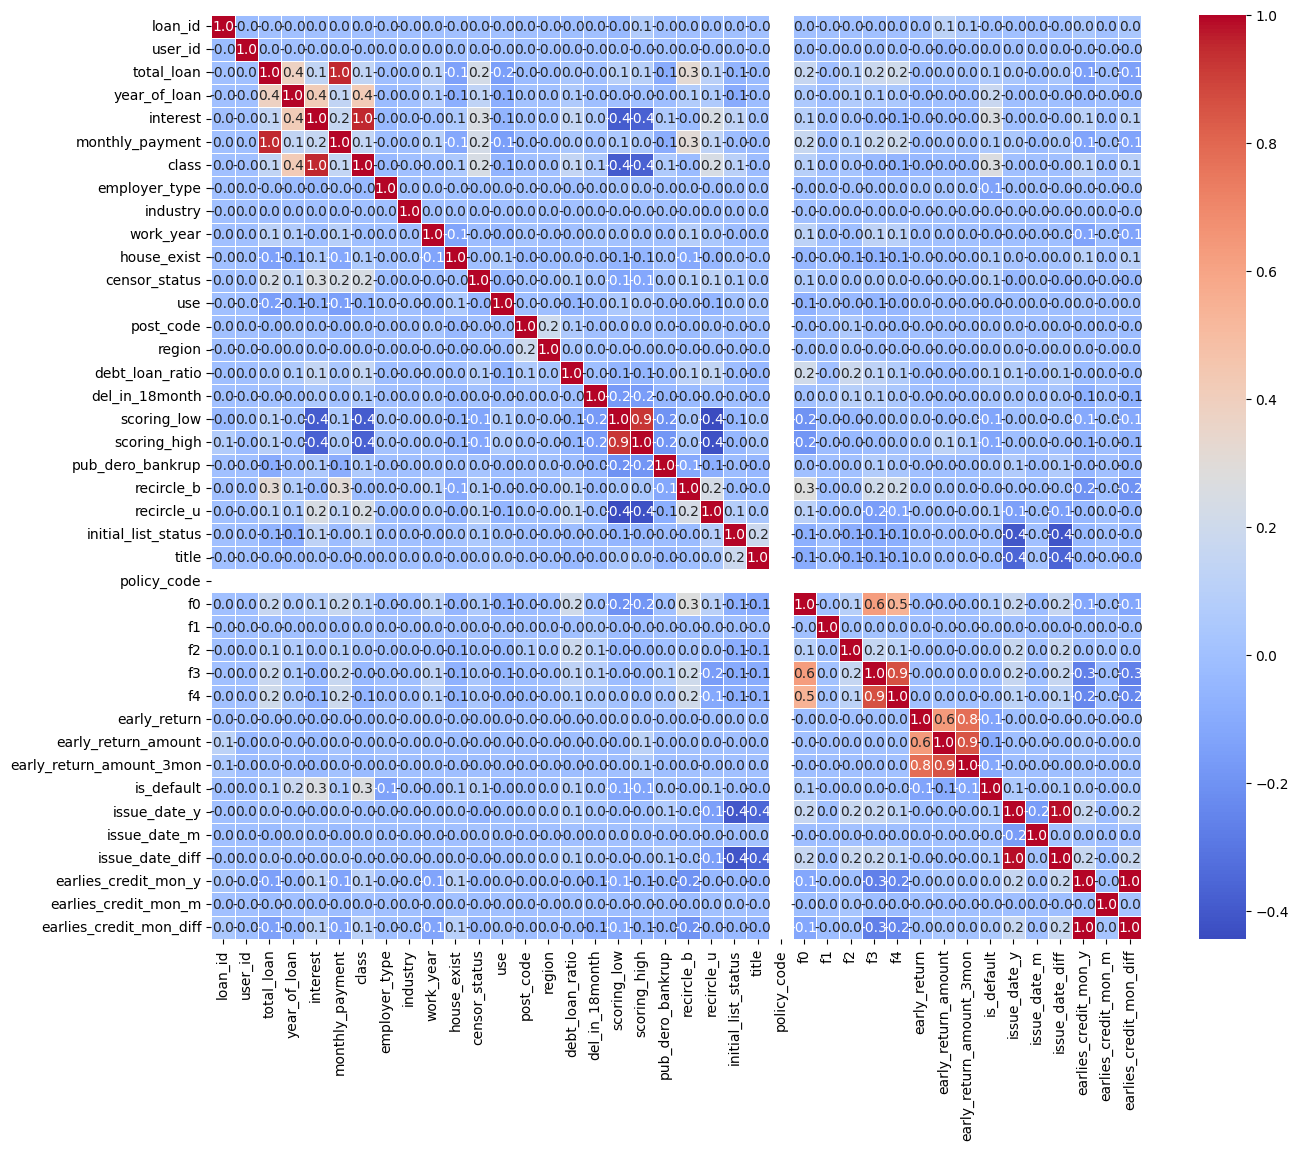

In [40]:
# 计算相关性矩阵
correlation_matrix = train_data.corr()

# 设置图形大小
plt.figure(figsize=(15, 12))

# 绘制热力图
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)

# 显示图形
plt.show()

In [41]:
# 查看每个特征和y的相关度，并按绝对值从大到小排序
correlations = train_data.corrwith(train_data['is_default'])
sorted_correlations = correlations.abs().sort_values(ascending=False)
sorted_correlations

is_default                  1.000000
class                       0.261670
interest                    0.258805
year_of_loan                0.174283
employer_type               0.137845
early_return                0.127701
scoring_low                 0.125487
scoring_high                0.122957
early_return_amount_3mon    0.108116
early_return_amount         0.101055
censor_status               0.088187
debt_loan_ratio             0.085248
f0                          0.073726
total_loan                  0.064717
recircle_u                  0.059029
house_exist                 0.054276
issue_date_diff             0.052803
issue_date_y                0.052477
monthly_payment             0.051284
earlies_credit_mon_y        0.041843
earlies_credit_mon_diff     0.041782
work_year                   0.030013
use                         0.029004
pub_dero_bankrup            0.026182
title                       0.025483
recircle_b                  0.020920
del_in_18month              0.020006
f

删选相关度小于0.04的特征

In [42]:
# 保留loan_id并设置相关度阈值
correlation_threshold = 0.04

# 根据阈值删除特征
features_to_drop = sorted_correlations[sorted_correlations < correlation_threshold].index

# 如果loan_id在要删除的特征中，将其排除在外
if 'loan_id' in features_to_drop:
    features_to_drop = features_to_drop.drop('loan_id')

# 添加 policy_code 到要删除的特征列表
features_to_drop = features_to_drop.union(['policy_code'])

# 打印将要删除的特征
print("将要删除的特征:")
print(features_to_drop)

# 从数据集中删除特征
train_filtered = train_data.drop(columns=features_to_drop)
test_filtered = test_data.drop(columns=features_to_drop)

# 打印处理后的数据集信息
print("\n处理后的数据集信息:")
train_filtered.info()

将要删除的特征:
Index(['del_in_18month', 'earlies_credit_mon_m', 'f1', 'f2', 'f3', 'f4',
       'industry', 'initial_list_status', 'issue_date_m', 'policy_code',
       'post_code', 'pub_dero_bankrup', 'recircle_b', 'region', 'title', 'use',
       'user_id', 'work_year'],
      dtype='object')

处理后的数据集信息:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 760000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   760000 non-null  int64  
 1   total_loan                760000 non-null  float64
 2   year_of_loan              760000 non-null  int64  
 3   interest                  760000 non-null  float64
 4   monthly_payment           760000 non-null  float64
 5   class                     760000 non-null  int64  
 6   employer_type             760000 non-null  int64  
 7   house_exist               760000 non-null  int64  
 8   censor_status            

In [43]:
train_filtered.to_csv('/content/drive/MyDrive/AI_Project/data/clean_data/train.csv', index=False)
test_filtered.to_csv('/content/drive/MyDrive/AI_Project/data/clean_data/test.csv', index=False)